In [7]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [22]:
from dslib.analysis import Analysis
a = Analysis.from_csv('data/forestfires.csv')

# Plotting Several Distribuitions with Interactive Plots

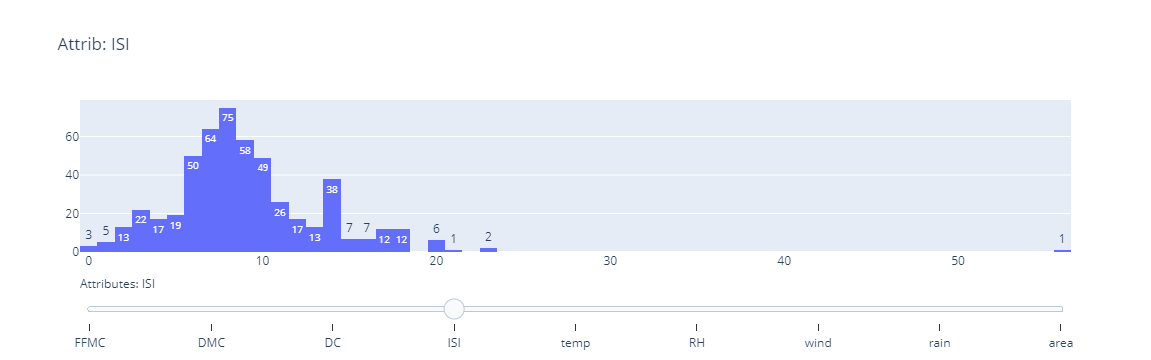

In [56]:
attrib_list = a.data.columns[4:]
attrib_active_idx = 0

# Create figure
fig = go.Figure()

for attrib in attrib_list:
    fig.add_trace(go.Histogram(
        visible=[False, True][attrib == attrib_list[attrib_active_idx]],
        x=a.columns(attrib),
        # name=attrib + " = %{y}",
        hoverinfo="y",
        texttemplate="%{y}"
    ))

# Create and add slider
steps = []
for i, attrib in enumerate(attrib_list):
    step = dict(
        method="update",
        args=[
            {"visible": [False] * len(fig.data)},
            {"title": "Attrib: " + attrib}
        ],  # layout attribute
        label = attrib,
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=attrib_active_idx,
    currentvalue={
        "prefix": "Attributes: ",
        "visible": True
    },
    # pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

# Plotting Variance and Uniformization

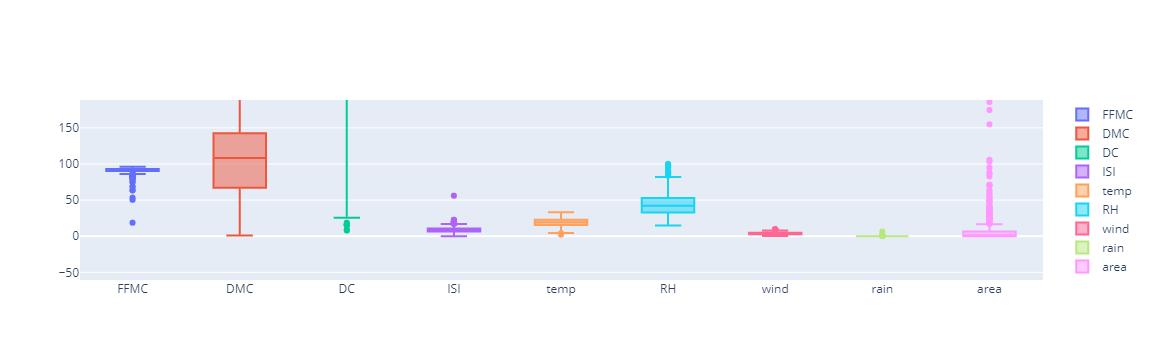

In [60]:
fig = go.Figure()

for attrib in attrib_list:
    fig.add_trace(go.Box(y=a.columns(attrib),name=attrib))

fig.show()

In [63]:
from sklearn import preprocessing
X_train=a.data[attrib_list]
scaler = preprocessing.StandardScaler().fit(X_train)
X = scaler.transform(X_train)

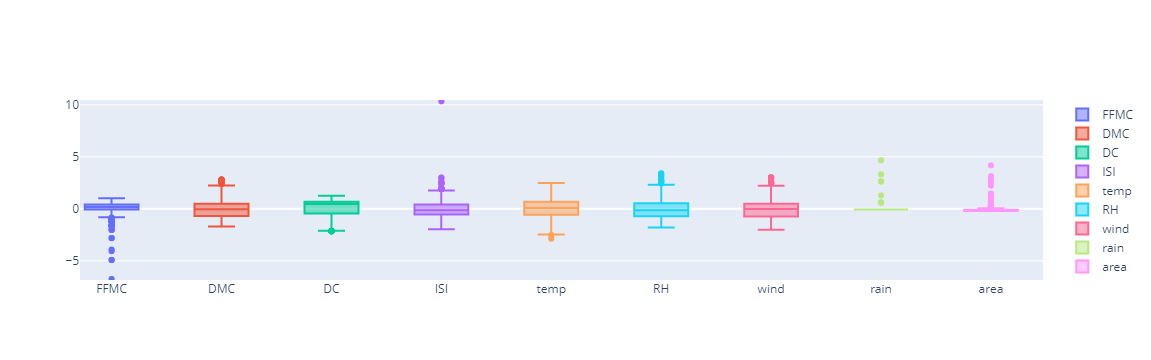

In [69]:
fig = go.Figure()

for idx, attrib in enumerate(attrib_list):
    fig.add_trace(go.Box(y=X[:,idx],name=attrib))

fig.show()

In [68]:
X.shape

(517, 9)